In [1]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 7.0MB/s 
Hit:1 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:5 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:11 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:12 https://devel

In [2]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm.notebook import tqdm as tqdm
import pandas
import json
import pprint

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [4]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=1&cy=I")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


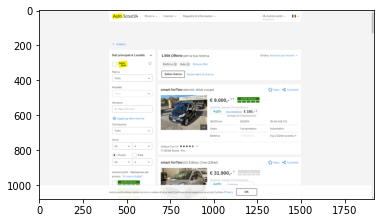

In [5]:
import time
wd.set_window_size(1920, 1080)
time.sleep(2)
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()

In [6]:
def loop_offer_pages(x):

  id = x.get_attribute("data-guid") #guid dell'annuncio
  try:
    page = x.find_element_by_css_selector(".cldt-summary-titles > a").get_attribute("href") #pagina dell'annauncio
    vehicle = x.find_element_by_css_selector(".cldt-summary-makemodel.sc-font-bold.sc-ellipsis").text
    price = x.find_elements_by_css_selector("""[data-item-name="price"]""")[0].text # 23 restituisce se c'è una rata, iva dedicibile etc
    vehicle_data = x.find_elements_by_css_selector(".cldt-summary-vehicle-data")[0].text.split("\n")
  except:
    page = ""
    vehicle = ""
    price = ""
    vehicle_data = ""
  try:
    vehicle_usr_desc = x.find_elements_by_css_selector(".cldt-summary-version")[0].text
  except:
     vehicle_usr_desc = ""
  seller_list = x.find_elements_by_css_selector("""[data-item-name="seller"]""")[0].text.split("\n")
  if seller_list[1].find('(') != -1:
    del seller_list[1]
  seller = seller_list[0]
  seller_country = seller_list[1]
  seller_address = seller_list[2]
  return {
      'id_annuncio': id,
      'link_annuncio': page,
      'vehicle': vehicle,
      'vehicle_user_desc' : vehicle_usr_desc,
      'asking_price' : price,
      'vehicle_data' : vehicle_data,
      'seller' : seller,
      'country' : seller_country,
      'address' : seller_address,
      }




In [7]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import numpy as np
import requests
import urllib.request
import os

path_offers_page = 'screenshot/offers_page/'
path_single_offers_page = 'screenshot/single_offer_page/'
path_offer_img = 'screenshot/single_offer_page/offer_img/'

try:
 os.makedirs(path_offers_page)
 os.makedirs(path_single_offers_page)
 os.makedirs(path_offer_img)
except:
  pass

#create blank list to enclose all offers page results
output_scraping = []

for i in tqdm(range(1,21)): #20 is hard coded :(
  url = "https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=" + str(i) + "&cy=I"
  print(url)
  time.sleep(abs(np.random.normal(2,2)))
  wd.set_window_size(1920,1080)
  wd.get(url)
  try:
    WebDriverWait(wd, 15).until(
        EC.element_to_be_clickable((By.CSS_SELECTOR, "a.active")) #loads bottom bar, which is the last to be loaded in chromium
    )
  except:
    continue
  wd.save_screenshot(path_offers_page + str(i) + '.png')
  lista_annunci = wd.find_elements_by_css_selector(".cl-list-element.cl-list-element-gap")
  for x in lista_annunci:
    output_scraping.append(loop_offer_pages(x))
  #if len(lista_annunci) < 20: #exit if there are less than 20 offers on 1 page
  #  break


https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=1&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=2&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=3&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=4&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=5&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=6&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=7&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=8&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=9&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=10&cy=I
https://www.autoscout24.it/lst?sort=age&desc=1&fuel=E&ustate=N%2CU&size=20&page=11&cy=I
https://www.autoscout24.it/lst?sort=age&d

In [8]:
print(len(output_scraping))

400


In [9]:
import json
export_output_scraping = open('export_output_scraping.json', mode='w+')
export_output_scraping.write(json.dumps(output_scraping, indent=3))
export_output_scraping.close()

In [10]:
details_raw = []
details_value = wd.find_elements_by_css_selector("""[data-item-name="car-details"] >* dd""")
details_field = wd.find_elements_by_css_selector("""[data-item-name="car-details"] >* dt""")
for i in range(0,len(details_field)):
  details_raw_field = details_field[i].text
  details_raw_value = details_value[i].text
  if details_raw_value == "":
    details_raw_value = "Sì"
  details_raw.append(details_raw_field)
  details_raw.append(details_raw_value)

it = iter(details_raw) 
details = dict(zip(it, it)) 
print(details)

{}


In [11]:
def loop_single_offer_pages(k):
  url = k['link_annuncio']
  print (url)
  wd.set_window_size(1920,1080)
  wd.get(url)

  wd.save_screenshot(path_single_offers_page + k['id_annuncio']+ ".png")
  try:
    user_description = wd.find_elements_by_css_selector("""[data-type="description"]""")[0].text
  except:
    user_description = ""

  try:
    equipment_raw = wd.find_elements_by_css_selector(".cldt-equipment-block span")
    equipment = []
    for l in equipment_raw:
      equipment.append(l.text)
    print (equipment)
  except:
    equipment = ""


  details_raw = []
  details_value = wd.find_elements_by_css_selector("""[data-item-name="car-details"] >* dd""")
  details_field = wd.find_elements_by_css_selector("""[data-item-name="car-details"] >* dt""")
  for m in range(0,len(details_field)):
    details_raw_field = details_field[m].text
    details_raw_value = details_value[m].text
    if details_raw_value == "":
      details_raw_value = "Sì"
    details_raw.append(details_raw_field)
    details_raw.append(details_raw_value)
  it = iter(details_raw) 
  details = dict(zip(it, it)) 
  print (details)
  
  try:
    vehicle_img = wd.find_element_by_css_selector(".single-picture > img").get_attribute("src")
    print(vehicle_img)
    urllib.request.urlretrieve(vehicle_img, path_offer_img + k['id_annuncio'] + ".jpg")
  except:
    try:
      vehicle_img = wd.find_element_by_css_selector("""[style="order: 0;"] > * > .gallery-picture__image""").get_attribute("src")
      print(vehicle_img)
      urllib.request.urlretrieve(vehicle_img, path_offer_img + k['id_annuncio'] + ".jpg")
    except:
      vehicle_img = open(path_offer_img + k['id_annuncio'] + ".jpg", "w")
  
  return {
      'id_annuncio' : k['id_annuncio'],
      'user_description' : user_description,
      'equipment' : equipment,
      'specs' : details,
      'img' : k['id_annuncio'] + ".jpg"
       }

In [12]:
output_single_offers_scraping = []
import urllib.request

for i in output_scraping:
  output_single_offers_scraping.append(loop_single_offer_pages(i))

https://www.autoscout24.it/annunci/smart-fortwo-electric-drive-coupe-elettrica-nero-084037c1-3fbe-48ce-b5b2-f1a278522e22?cldtidx=1&cldtsrc=listPage
['Alzacristalli elettrici', 'Climatizzatore', 'Autoradio', 'Cerchi in lega', 'ABS', 'Airbag conducente', 'Airbag laterali', 'Airbag passeggero', 'Chiusura centralizzata', 'Controllo automatico trazione', 'ESP', 'Fendinebbia', 'Immobilizzatore elettronico', 'Servosterzo']
{'Tipo di veicolo': 'Usato', 'Per neopatentati': 'Sì', 'Proprietari': '1', 'Usato Garantito': '12 mese', 'Tagliandi certificati': 'Sì', 'Veicolo per non fumatori': 'Sì', 'Marca': 'smart', 'Modello': 'forTwo', 'Offerta n.': '13540123', 'Anno': '2014', 'Colore esterno': 'Nero', 'Tipo di vernice': 'Metallizzato', 'Colore originale': 'Nero', 'Rivestimenti': 'Stoffa, Nero', 'Carrozzeria': 'City car', 'Porte': '3', 'Posti a sedere': '2', 'Tipo di cambio': 'Automatico', 'Marce': '1', 'Peso a vuoto': '975 kg', 'Tipo di unità': 'posteriore', 'Alimentazione': 'Elettrica', 'Emissioni 

In [13]:
print (len(output_single_offers_scraping))

400


In [14]:
import json
export_output_single_offers_scraping = open('export_output_single_offers_scraping.json', mode='w+')
export_output_single_offers_scraping.write(json.dumps(output_single_offers_scraping, indent=3))
export_output_single_offers_scraping.close()

In [15]:
!zip -r "screenshot.zip" "/content/screenshot/"

  adding: content/screenshot/ (stored 0%)
  adding: content/screenshot/offers_page/ (stored 0%)
  adding: content/screenshot/offers_page/5.png (deflated 6%)
  adding: content/screenshot/offers_page/14.png (deflated 5%)
  adding: content/screenshot/offers_page/12.png (deflated 6%)
  adding: content/screenshot/offers_page/18.png (deflated 6%)
  adding: content/screenshot/offers_page/19.png (deflated 4%)
  adding: content/screenshot/offers_page/3.png (deflated 5%)
  adding: content/screenshot/offers_page/1.png (deflated 5%)
  adding: content/screenshot/offers_page/8.png (deflated 5%)
  adding: content/screenshot/offers_page/6.png (deflated 5%)
  adding: content/screenshot/offers_page/20.png (deflated 10%)
  adding: content/screenshot/offers_page/17.png (deflated 5%)
  adding: content/screenshot/offers_page/10.png (deflated 21%)
  adding: content/screenshot/offers_page/7.png (deflated 5%)
  adding: content/screenshot/offers_page/9.png (deflated 6%)
  adding: content/screenshot/offers_page/